In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Conditions
conditions = ["0h", "2.5h ctrl", "2.5h agar", "5h ctrl", "5h agar"]

# Dictionnaire pour stocker les valeurs pour chaque condition
values_fold = {
    "0h": [0.07613051, 0, 0.04401211],  
    "2.5h ctrl": [0.084384846, 0.09194583, 0.092262554, 0.153685956],
    "2.5h agar": [0.563647783, 0.19372253, 0.193722532, 0.205122608],
    "5h ctrl": [0.303412787, 0.144926757, 0.162371617],
    "5h agar": [0.142683246, 0.139429177, 0.130015471], 
}

values_fold_max = pd.DataFrame({key: values + [np.nan] * (4 - len(values)) for key, values in values_fold.items()})
values_fold_max.to_csv('values_fold_mean', index=True)

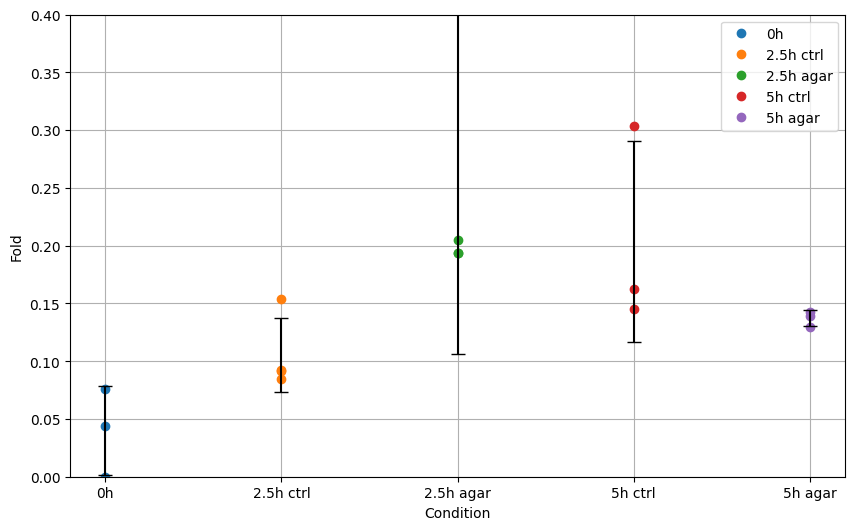

In [33]:
import matplotlib.pyplot as plt

means = [np.mean(values) for values in values_fold.values()]
std_devs = [np.std(values, ddof=1) for values in values_fold.values()]

# Tracé du dot plot avec barres d'erreur pour l'écart type
plt.figure(figsize=(10, 6))

for i, condition in enumerate(conditions):
    x_values = [i + 1] * len(values_fold[condition])
    plt.plot(x_values, values_fold[condition], marker='o', linestyle='', label=condition)
    plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='none', color='black', capsize=5)

plt.xlabel('Condition')
plt.ylabel('Fold')
plt.xticks(range(1, len(conditions) + 1), conditions)
plt.grid(True)
plt.ylim(0, 0.4)
plt.legend()
plt.savefig('dot_plot_with_std_dev.png', transparent=False)
plt.show()

In [34]:
from scipy.stats import kstest, mannwhitneyu, norm
import matplotlib.pyplot as plt

# Fonction pour filtrer les données
def clean_data(data):
    cleaned_data = []
    for x in data:
        if x is None or isinstance(x, (str, bool)) or x != x or x in (float('inf'), float('-inf')):
            continue
        cleaned_data.append(x)
    return cleaned_data

# Fonction pour effectuer les tests de normalité et de Mann-Whitney
def perform_tests(ctrl_data, agar_data, y_pos, star_pos):
    # Filtrer les données
    ctrl_data_clean = clean_data(ctrl_data)
    agar_data_clean = clean_data(agar_data)
    
    # Vérifier que les listes ne sont pas vides
    if len(ctrl_data_clean) == 0 or len(agar_data_clean) == 0:
        print("Les listes de données ne doivent pas être vides après nettoyage.")
        return
    
    # Vérifier que les listes ne contiennent pas des valeurs identiques
    if len(set(ctrl_data_clean)) == 1 or len(set(agar_data_clean)) == 1:
        print("Les listes de données ne doivent pas contenir uniquement des valeurs identiques.")
        return
    
    # Test de Mann-Whitney
    mannwhitney_result = mannwhitneyu(ctrl_data_clean, agar_data_clean, alternative='two-sided')

    print(f"Test de Mann-Whitney entre ctrl et agar : {mannwhitney_result}")

    if mannwhitney_result.pvalue < 0.05:
        plt.text(star_pos, y_pos, '***', fontsize=12)
    elif mannwhitney_result.pvalue < 0.01:
        plt.text(star_pos, y_pos, '****', fontsize=12)

In [35]:
from scipy.stats import shapiro, mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
def perform_tests_ct(ctrl_data1, ctrl_data2, y_pos, star_pos):
    ctrl1_data_clean = clean_data(ctrl_data1)
    ctrl2_data_clean = clean_data(ctrl_data2)
    mannwhitney_result = mannwhitneyu([x for x in ctrl1_data_clean if x is not None],
                                      [x for x in ctrl1_data_clean if x is not None],
                                      alternative='two-sided')
    print(f"Test de Mann-Whitney entre ctrl et ctrl : {mannwhitney_result}")

    if mannwhitney_result.pvalue < 0.05:
        plt.text(star_pos, y_pos, '***', fontsize=12)
    elif mannwhitney_result.pvalue < 0.01:
        plt.text(star_pos, y_pos, '****', fontsize=12)

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Conditions
conditions = ["0h", "2.5h ctrl", "2.5h agar", "5h ctrl", "5h agar"]

# Dictionnaire pour stocker les valeurs pour chaque condition
values_fold = {
    "0h": [0.02324345, 0, 0],  
    "2.5h ctrl": [0.039905782, 0.039905782, 0, 0],
    "2.5h agar": [0.03990578, 0.06481454, 0.10422501, 0.10030412],
    "5h ctrl": [0.135810258, 0.133657052, 0.181945311],
    "5h agar": [0.089925172, 0.128013067, 0.143166716], 
}
fold_data = pd.DataFrame({key: values + [np.nan] * (4 - len(values)) for key, values in values_fold.items()})
fold_data.to_csv('fold_data', index=True)

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=0.0, pvalue=0.02857142857142857)


/tmp/ipykernel_1060/4246401158.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)


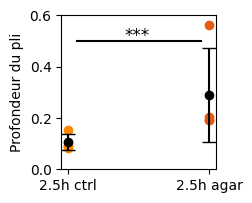

In [53]:
df_filtered = values_fold_max[["2.5h ctrl", "2.5h agar"]]

# Calculer les moyennes et les écarts types
means = df_filtered.mean()
std_devs = df_filtered.std(ddof=1)
custom_palette = ["#ff8800ff", "#e65a11ff"] 
# Créer le dot plot
plt.figure(figsize=(2, 2))

# Tracer les points pour chaque condition
for i, condition in enumerate(df_filtered.columns):
    x_values = [i + 1] * len(df_filtered[condition])
    plt.plot(x_values, df_filtered[condition], 'o',  color=custom_palette[i])
    plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)

plt.ylabel('Profondeur du pli')
plt.xticks(range(1, len(df_filtered.columns) + 1), df_filtered.columns)

plt.ylim(0, 0.6)
perform_tests(df_filtered["2.5h ctrl"], df_filtered["2.5h agar"], + 0.5, 1.4)
plt.axhline(y=0.5, xmin=0.1, xmax=0.9, color='black', linestyle='-')
plt.savefig('../image/Fold_2h30.png', transparent=False, bbox_inches='tight')
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=0.0, pvalue=0.05714285714285714)
Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=0.0, pvalue=0.1)


/tmp/ipykernel_1060/3738694634.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)


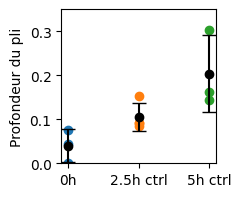

In [59]:
df_filtered = values_fold_max[["0h", "2.5h ctrl", "5h ctrl"]]

# Calculer les moyennes et les écarts types
means = df_filtered.mean()
std_devs = df_filtered.std(ddof=1)

# Créer le dot plot
plt.figure(figsize=(2, 2))

# Tracer les points pour chaque condition
for i, condition in enumerate(df_filtered.columns):
    x_values = [i + 1] * len(df_filtered[condition])
    plt.plot(x_values, df_filtered[condition], 'o')
    plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)

plt.ylabel('Profondeur du pli')
plt.xticks(range(1, len(df_filtered.columns) + 1), df_filtered.columns)
plt.ylim(0, 0.35)
perform_tests(df_filtered["0h"], df_filtered["2.5h ctrl"], + 0.5, 1.4)
perform_tests(df_filtered["0h"], df_filtered["5h ctrl"], + 0.5, 1.4)


plt.savefig('../image/Fold_dev.png', transparent=False, bbox_inches='tight')
plt.show()

Test de Mann-Whitney entre ctrl et agar : MannwhitneyuResult(statistic=9.0, pvalue=0.1)


/tmp/ipykernel_1060/3802221680.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)


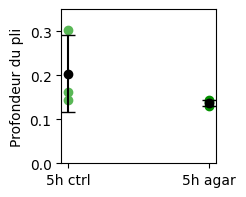

In [58]:
df_filtered = values_fold_max[["5h ctrl", "5h agar"]]

# Calculer les moyennes et les écarts types
means = df_filtered.mean()
std_devs = df_filtered.std(ddof=1)
custom_palette = ["#59b756ff", "#049000ff"]
# Créer le dot plot
plt.figure(figsize=(2, 2))

# Tracer les points pour chaque condition
for i, condition in enumerate(df_filtered.columns):
    x_values = [i + 1] * len(df_filtered[condition])
    plt.plot(x_values, df_filtered[condition], 'o', color=custom_palette[i])
    plt.errorbar(i + 1, means[i], yerr=std_devs[i], fmt='o', color='black', capsize=5)

plt.ylabel('Profondeur du pli')
plt.xticks(range(1, len(df_filtered.columns) + 1), df_filtered.columns)
plt.ylim(0, 0.35)
perform_tests(df_filtered["5h ctrl"], df_filtered["5h agar"], + 0.5, 1.4)
plt.savefig('../image/Fold_5h.png', transparent=False, bbox_inches='tight')
plt.show()